## Lineer REG

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [53]:
class StepLogger():
    def __init__(self,capacity):
        self.tensor_datas = {}        
        self.capacity = capacity
        self.added_labels = []
        
    
    def add_info(self,tensor_data,tensor_label):
        if tensor_label not in self.added_labels:
            self.added_labels.append( tensor_label )
        
        if tensor_label in self.tensor_datas.keys():
            current_arr = self.tensor_datas.get(tensor_label)
            if len(current_arr) < self.capacity:
                current_arr = self.tensor_datas.get(tensor_label, [])
                current_arr.append(tensor_data)
        else:
            self.tensor_datas[tensor_label] = [tensor_data]
    
    def get_default_summary(self,show_data=False,summary_count=1):
        self.get_summary(self.added_labels,show_data)
        
    def get_summary(self,labels,show_data=False,summary_count=1):
        count = 0
        for i in range(summary_count):
            for l in labels:
                label_data = self.tensor_datas.get(l)[count]
                print(l," :")
                if torch.is_tensor(label_data):
                    print( list(label_data.size() ) )
                if not show_data and not torch.is_tensor(label_data):
                    print(label_data)
                if show_data:    
                    print(label_data)

In [43]:
m, c = 2, 3
noise = np.random.randn(250) / 4
x = np.random.rand(250)
y = x * m + c + noise

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)


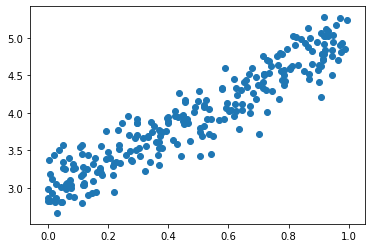

In [48]:
plt.scatter(x=x, y=y)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

x_var_test = Variable(torch.FloatTensor(x_test))
y_var_test = Variable(torch.FloatTensor(y_test))

x_var_train = Variable(torch.FloatTensor(x_train))
y_var_train = Variable(torch.FloatTensor(y_train))

In [61]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        
        step_logger.add_info(x,"Inputs")
        out = self.linear(x)
        step_logger.add_info(out,"Out")
        
        return out 
    
    
step_logger =  StepLogger(2)
model = LinearRegressionModel(input_dim = 1 , output_dim=1)    
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [62]:
for epoch in range(500):
    
    
    optimizer.zero_grad()
    y_pred = model(x_var_train)
    loss = criterion(y_pred, y_var_train)
    loss.backward()
    
    optimizer.step()
    if ((epoch) % 12 == 0 ):
        print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 0, loss 24.037296295166016
epoch 12, loss 12.759601593017578
epoch 24, loss 6.78759241104126
epoch 36, loss 3.6251633167266846
epoch 48, loss 1.9505242109298706
epoch 60, loss 1.0637329816818237
epoch 72, loss 0.5941399335861206
epoch 84, loss 0.3454705476760864
epoch 96, loss 0.21378910541534424
epoch 108, loss 0.14405786991119385
epoch 120, loss 0.10713193565607071
epoch 132, loss 0.08757775276899338
epoch 144, loss 0.07722251117229462
epoch 156, loss 0.07173857092857361
epoch 168, loss 0.06883424520492554
epoch 180, loss 0.06729589402675629
epoch 192, loss 0.06648096442222595
epoch 204, loss 0.06604908406734467
epoch 216, loss 0.06582003086805344
epoch 228, loss 0.06569845974445343
epoch 240, loss 0.06563373655080795
epoch 252, loss 0.06559915840625763
epoch 264, loss 0.06558054685592651
epoch 276, loss 0.0655704066157341
epoch 288, loss 0.06556475907564163
epoch 300, loss 0.06556149572134018
epoch 312, loss 0.065559521317482
epoch 324, loss 0.06555820256471634
epoch 336, loss

In [63]:
step_logger.get_default_summary(False)

Inputs  :
[167, 1]
Out  :
[167, 1]


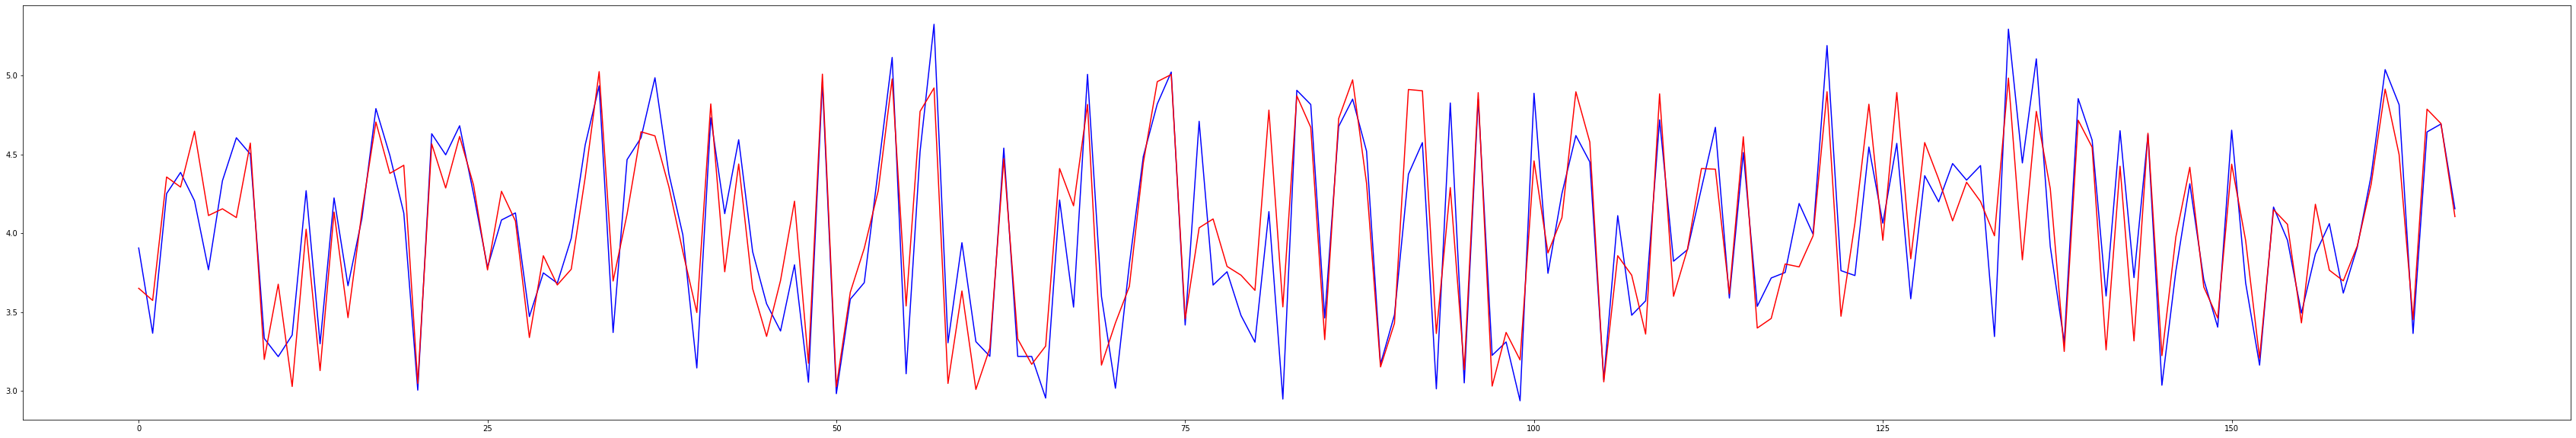

In [12]:
plt.figure(figsize=(60,10))
plt.plot(y_var_train.detach().numpy(), color="blue")
plt.plot(y_pred.detach().numpy(), color="red")

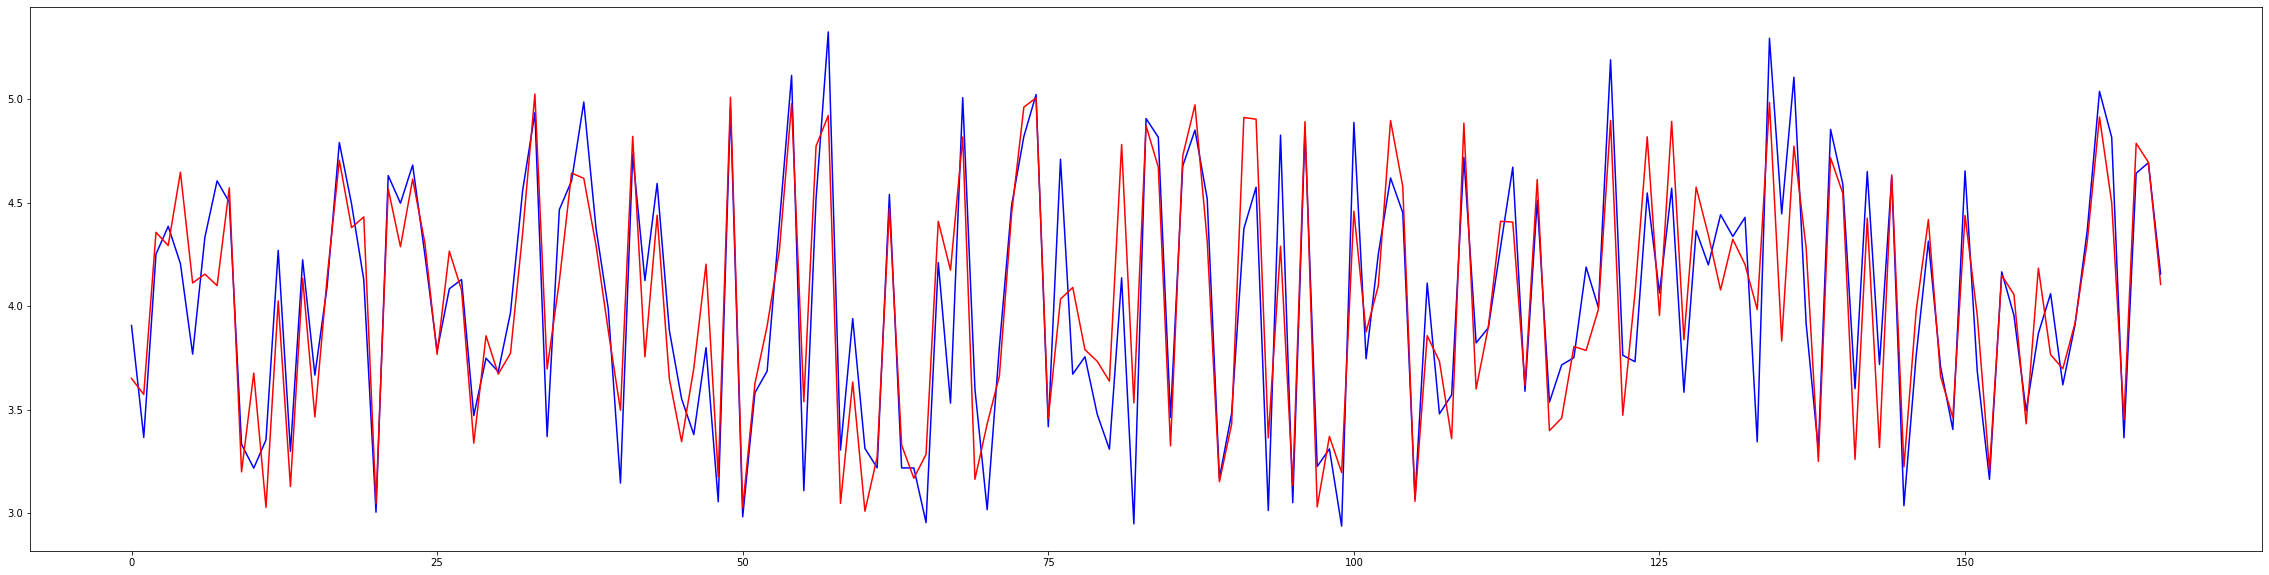

In [19]:
with torch.no_grad():
    
    predict = model(x_var_test)    
    predict=predict.numpy()
    x_var_test.numpy()
    
plt.figure(figsize=(40,10))
plt.plot(y_var_train.detach().numpy(), color="blue")
plt.plot(y_pred.detach().numpy(), color="red")   

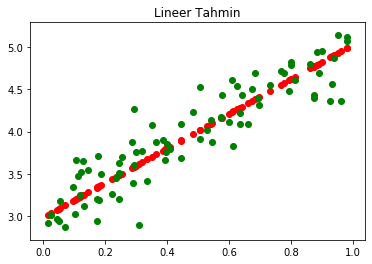

In [28]:
plt.title("Lineer Tahmin")
plt.scatter(x=x_var_test, y=predict , color="red")
plt.scatter(x=x_var_test, y=y_var_test , color="green")

## Parabol

In [53]:
x = torch.unsqueeze(torch.linspace(-1, 1, 200), dim=1)  
y = x.pow(2) + 0.2*torch.rand(x.size())                 

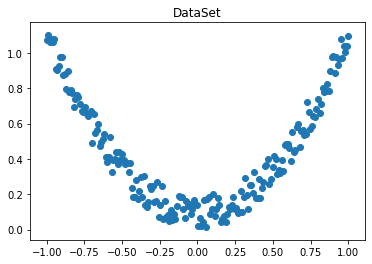

In [58]:
plt.title("DataSet")
plt.scatter(x=x, y=y)

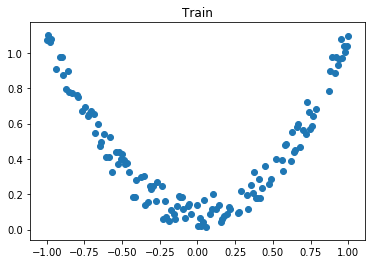

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
plt.title("Train")
plt.scatter(x=x_train, y=y_train)

x_var_test = Variable(torch.FloatTensor(x_test))
y_var_test = Variable(torch.FloatTensor(y_test))

x_var_train = Variable(torch.FloatTensor(x_train))
y_var_train = Variable(torch.FloatTensor(y_train))

In [59]:
for epoch in range(500):
    
    
    optimizer.zero_grad()
    y_pred = model(x_var_train)
    loss = criterion(y_pred, y_var_train)
    loss.backward()
    
    optimizer.step()
    if ((epoch) % 12 == 0 ):
        print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 0, loss 8.019314765930176
epoch 12, loss 5.302966117858887
epoch 24, loss 3.5814449787139893
epoch 36, loss 2.479832887649536
epoch 48, loss 1.7661628723144531
epoch 60, loss 1.2966663837432861
epoch 72, loss 0.9820220470428467
epoch 84, loss 0.7665550708770752
epoch 96, loss 0.6154090166091919
epoch 108, loss 0.5066345930099487
epoch 120, loss 0.4263016879558563
epoch 132, loss 0.3654809296131134
epoch 144, loss 0.3183746039867401
epoch 156, loss 0.2811582088470459
epoch 168, loss 0.2512604892253876
epoch 180, loss 0.2269144058227539
epoch 192, loss 0.20687519013881683
epoch 204, loss 0.1902434080839157
epoch 216, loss 0.1763523519039154
epoch 228, loss 0.164695143699646
epoch 240, loss 0.15487805008888245
epoch 252, loss 0.14658889174461365
epoch 264, loss 0.13957655429840088
epoch 276, loss 0.133636012673378
epoch 288, loss 0.12859828770160675
epoch 300, loss 0.12432297319173813
epoch 312, loss 0.12069278210401535
epoch 324, loss 0.11760906130075455
epoch 336, loss 0.114988870

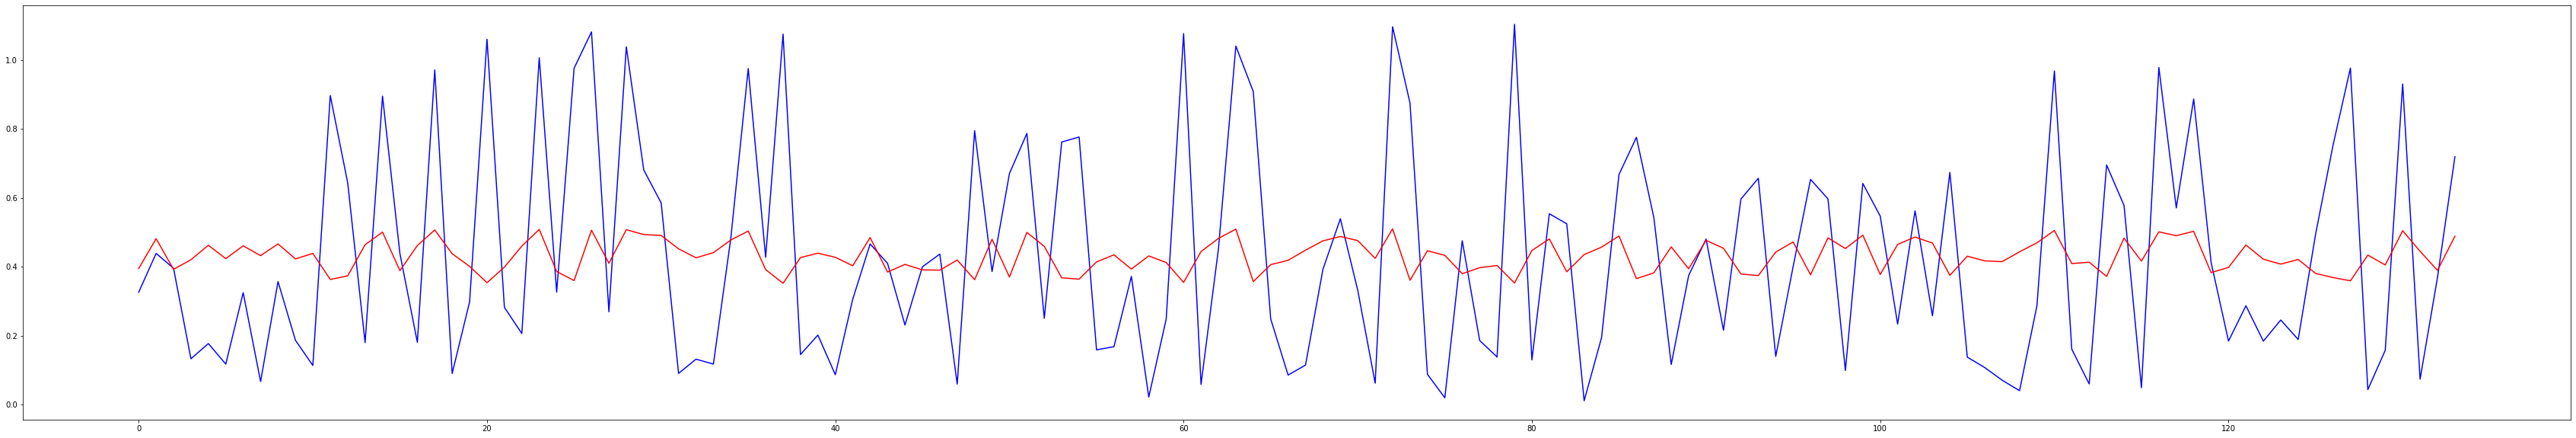

In [60]:
plt.figure(figsize=(60,10))
plt.plot(y_var_train.detach().numpy(), color="blue")
plt.plot(y_pred.detach().numpy(), color="red")

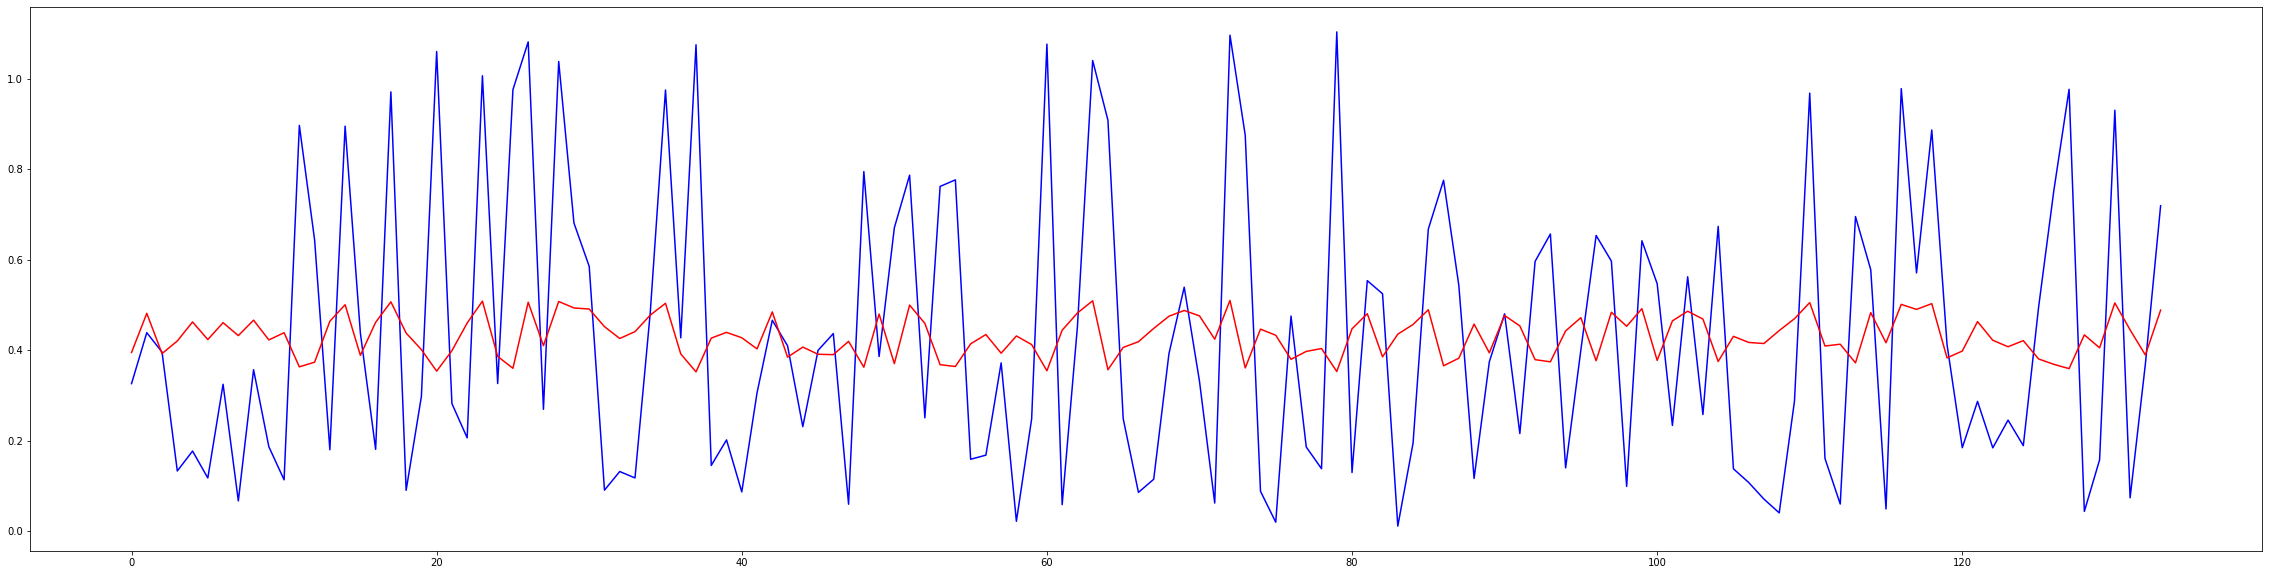

In [61]:
with torch.no_grad():
    
    predict = model(x_var_test)    
    predict=predict.numpy()
    x_var_test.numpy()
    
plt.figure(figsize=(40,10))
plt.plot(y_var_train.detach().numpy(), color="blue")
plt.plot(y_pred.detach().numpy(), color="red")

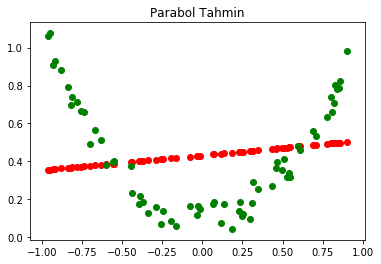

In [62]:
plt.title("Parabol Tahmin")
plt.scatter(x=x_var_test, y=predict , color="red")
plt.scatter(x=x_var_test, y=y_var_test , color="green")

#### **Lineer Model Çalışmadı, yeni model kurulacak**

In [111]:
class ParabolModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ParabolModel, self).__init__()
        self.linear1 = nn.Linear(input_dim, 6)
        self.linear2 = nn.Linear(6, output_dim)
        
    def forward(self, x):
        x = F.relu(self.linear1 (x))
        out = (self.linear2(x))
        return out 
    
    

modelP = ParabolModel(input_dim = 1 , output_dim=1)    
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(modelP.parameters(), lr=0.2) 

In [112]:
for epoch in range(500):
    
    
    optimizer.zero_grad()
    y_pred = modelP(x_var_train)
    loss = criterion(y_pred, y_var_train)
    loss.backward()
    
    optimizer.step()
    if ((epoch) % 12 == 0 ):
        print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 0, loss 0.3969566822052002
epoch 12, loss 0.07644499093294144
epoch 24, loss 0.06410478800535202
epoch 36, loss 0.053202856332063675
epoch 48, loss 0.044115930795669556
epoch 60, loss 0.03648469224572182
epoch 72, loss 0.029710939154028893
epoch 84, loss 0.021255817264318466
epoch 96, loss 0.015334920957684517
epoch 108, loss 0.012069639749825
epoch 120, loss 0.010355663485825062
epoch 132, loss 0.009382005780935287
epoch 144, loss 0.008751245215535164
epoch 156, loss 0.008321322500705719
epoch 168, loss 0.00791793130338192
epoch 180, loss 0.0075718252919614315
epoch 192, loss 0.007259983103722334
epoch 204, loss 0.006995466072112322
epoch 216, loss 0.006782097276300192
epoch 228, loss 0.006584825925529003
epoch 240, loss 0.00638537434861064
epoch 252, loss 0.006211414001882076
epoch 264, loss 0.006047461181879044
epoch 276, loss 0.005854184739291668
epoch 288, loss 0.005617112852632999
epoch 300, loss 0.005420975387096405
epoch 312, loss 0.005255552474409342
epoch 324, loss 0.00

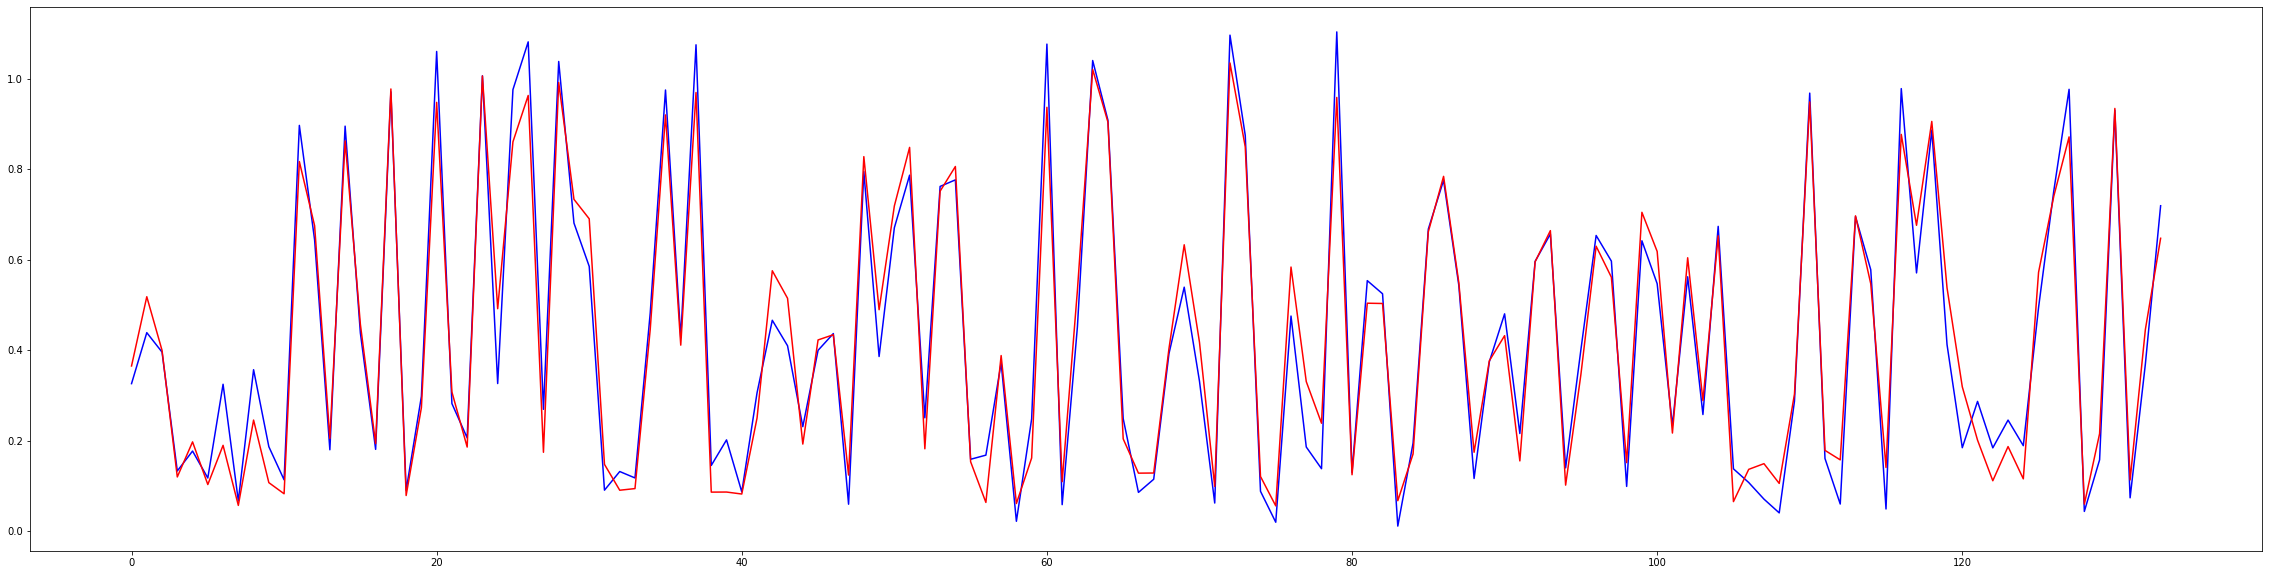

In [113]:
with torch.no_grad():
    
    predict = modelP(x_var_test)    
    predict=predict.numpy()
    x_var_test.numpy()
    
plt.figure(figsize=(40,10))
plt.plot(y_var_train.detach().numpy(), color="blue")
plt.plot(y_pred.detach().numpy(), color="red")

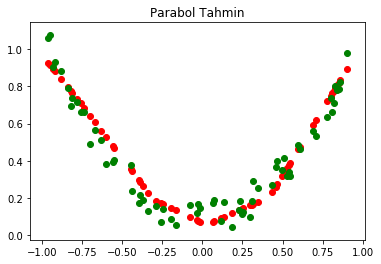

In [114]:
plt.title("Parabol Tahmin")
plt.scatter(x=x_var_test, y=predict , color="red")
plt.scatter(x=x_var_test, y=y_var_test , color="green")

## Sin

In [2]:
x = torch.unsqueeze(torch.linspace(-10, 10, 1000), dim=1)  
y = torch.sin(x) + 0.2*torch.rand(x.size())       

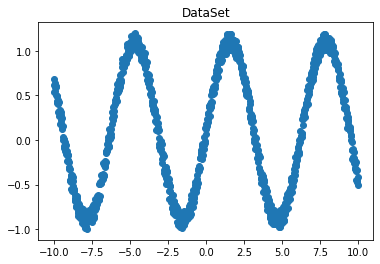

In [3]:
plt.title("DataSet")
plt.scatter(x=x, y=y)

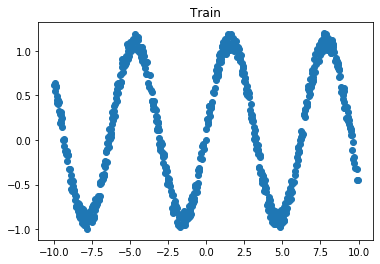

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
plt.title("Train")
plt.scatter(x=x_train, y=y_train)

x_var_test = Variable(torch.FloatTensor(x_test))
y_var_test = Variable(torch.FloatTensor(y_test))

x_var_train = Variable(torch.FloatTensor(x_train))
y_var_train = Variable(torch.FloatTensor(y_train))

In [35]:
class sinModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(sinModel, self).__init__()
        self.linear1 = nn.Linear(input_dim, 10)
        self.linear2 = nn.Linear(10, 50)
        self.linear3 = nn.Linear(50, output_dim)
        
    def forward(self, x):
        x = F.relu(self.linear1 (x))
        x = F.relu(self.linear2 (x))
        out = (self.linear3(x))
        return out 
    
    

modelS = sinModel(input_dim = 1 , output_dim=1)    
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(modelS.parameters(), lr=0.01) 

In [36]:
for epoch in range(500):
    
    
    optimizer.zero_grad()
    y_pred = modelS(x_var_train)
    loss = criterion(y_pred, y_var_train)
    loss.backward()
    
    optimizer.step()
    if ((epoch) % 12 == 0 ):
        print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 0, loss 0.9418090581893921
epoch 12, loss 0.440295547246933
epoch 24, loss 0.4278671443462372
epoch 36, loss 0.378266304731369
epoch 48, loss 0.3194032311439514
epoch 60, loss 0.2552737593650818
epoch 72, loss 0.20746169984340668
epoch 84, loss 0.18687811493873596
epoch 96, loss 0.17169131338596344
epoch 108, loss 0.1663258969783783
epoch 120, loss 0.16296418011188507
epoch 132, loss 0.15859617292881012
epoch 144, loss 0.1539706438779831
epoch 156, loss 0.14866754412651062
epoch 168, loss 0.14327451586723328
epoch 180, loss 0.13721896708011627
epoch 192, loss 0.1301431655883789
epoch 204, loss 0.11894270777702332
epoch 216, loss 0.1073429137468338
epoch 228, loss 0.09811487793922424
epoch 240, loss 0.0885060727596283
epoch 252, loss 0.08310212194919586
epoch 264, loss 0.08001560717821121
epoch 276, loss 0.07683319598436356
epoch 288, loss 0.0741620734333992
epoch 300, loss 0.07217903435230255
epoch 312, loss 0.06946521252393723
epoch 324, loss 0.06672656536102295
epoch 336, loss 

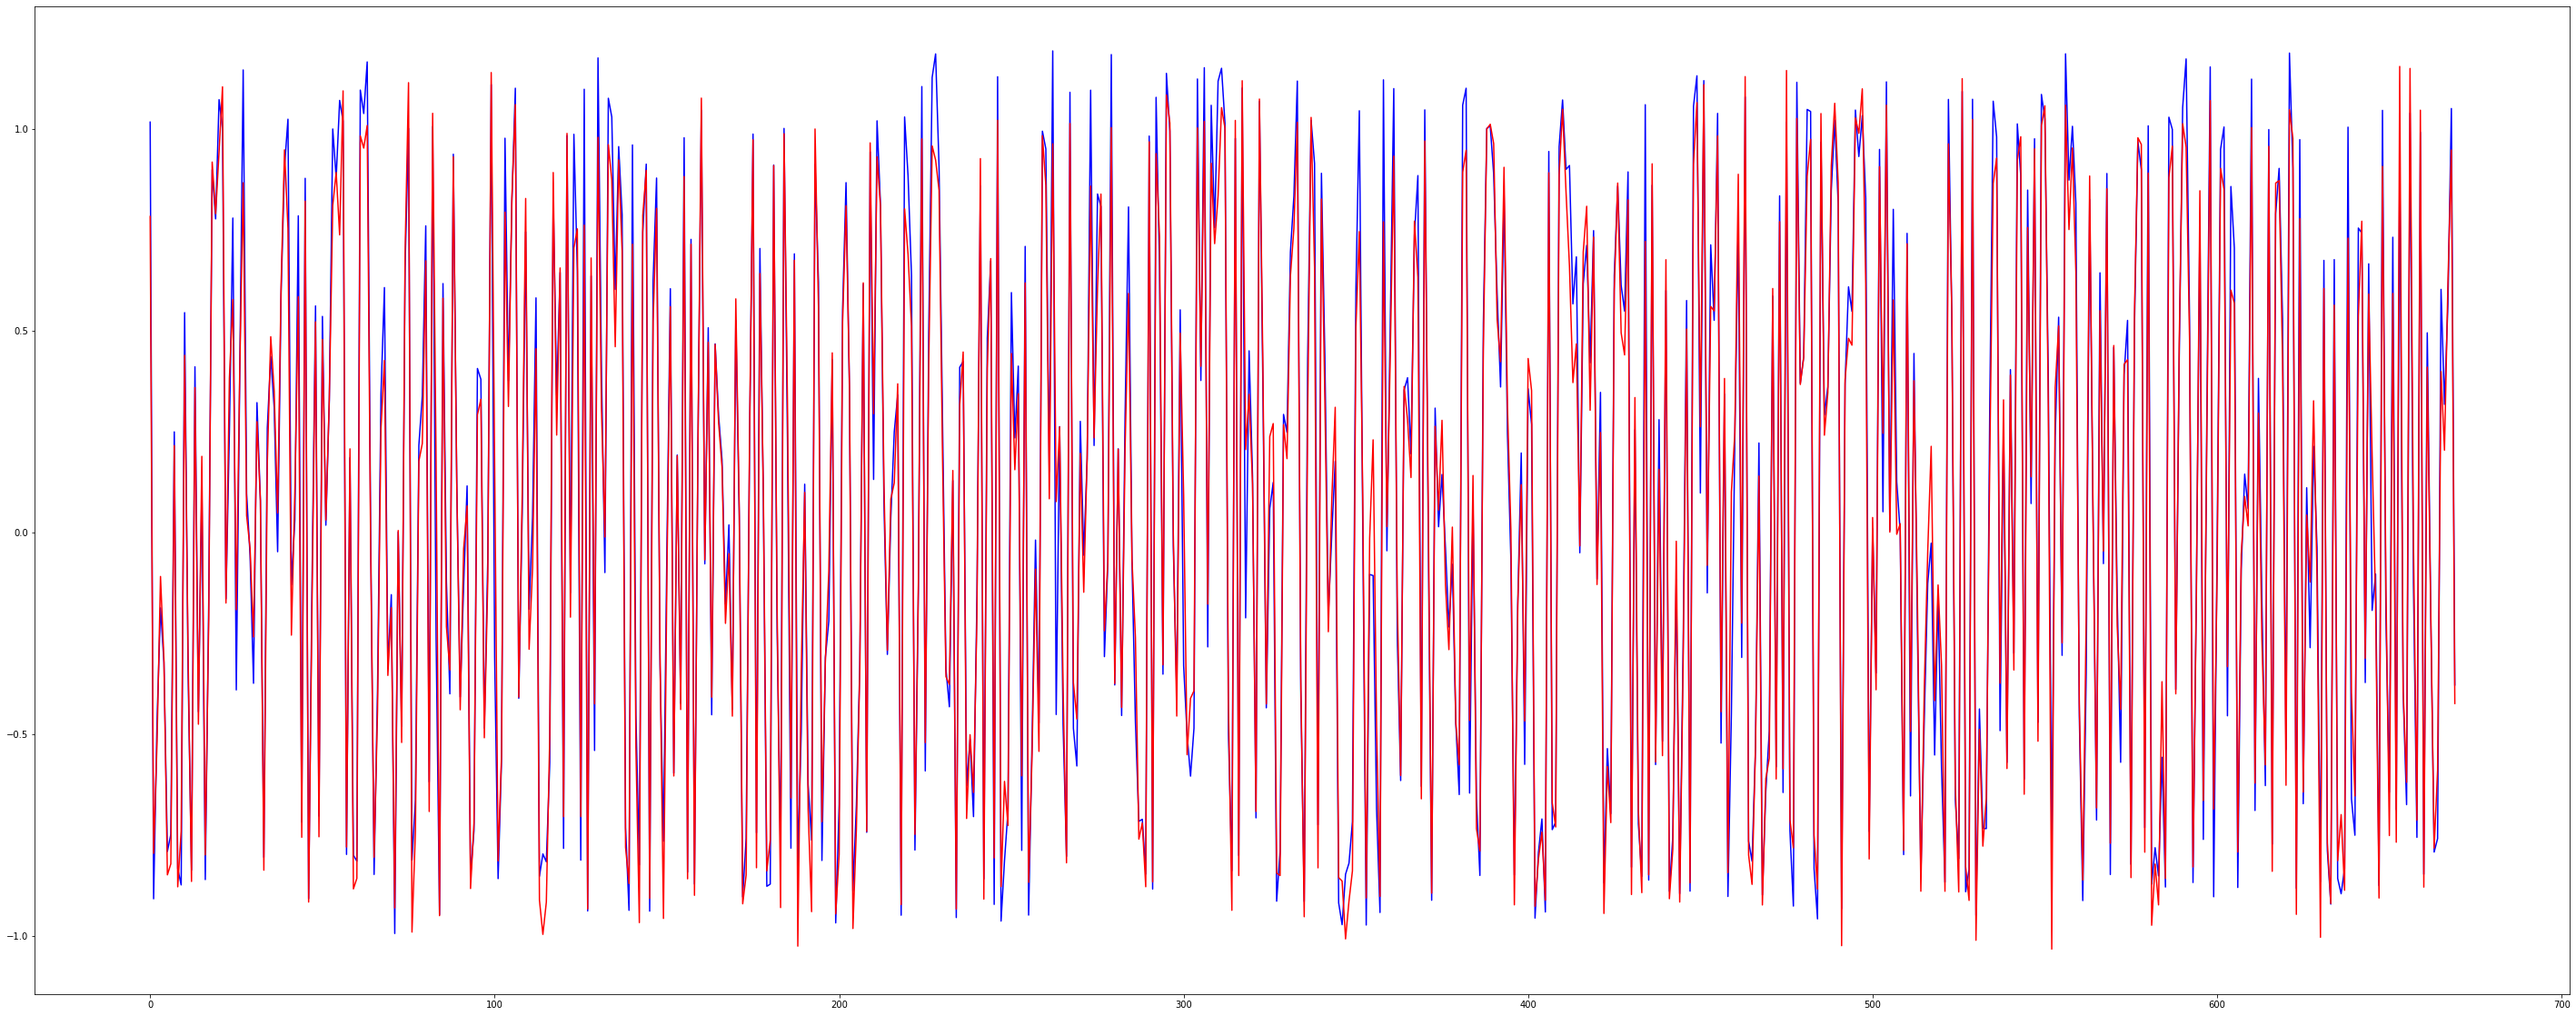

In [37]:
with torch.no_grad():
    
    predict = modelS(x_var_test)    
    predict=predict.numpy()
    x_var_test.numpy()
    
plt.figure(figsize=(50,20))
plt.plot(y_var_train.detach().numpy(), color="blue")
plt.plot(y_pred.detach().numpy(), color="red")

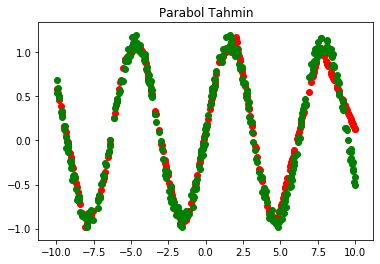

In [38]:
plt.title("Parabol Tahmin")
plt.scatter(x=x_var_test, y=predict , color="red")
plt.scatter(x=x_var_test, y=y_var_test , color="green")